## 1.Import Library

In [102]:
import pandas as pd         
import seaborn as sns       
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from pyvi import ViTokenizer

## 2.Explore Data Analysis

In [75]:
df_data=pd.read_csv("../data/combined_data.csv")

> 5 dòng đầu tiên

In [76]:
df_data.head(5)

,Product Name,Current Price,Reviewer,Rating,Comment,Time Used
0,Laptop Acer Aspire 3 A315 510P 32EF i3 N305/8G...,1.617354e+07,huyền trang,3,em muốn cài sang tiếng việt mà máy hong hỗ trợ,1 tháng
1,Laptop Acer Aspire 3 A315 510P 32EF i3 N305/8G...,1.617354e+07,Trịnh Thanh Tú,4,Em có mua máy này ở thế giới di động Sóc Trăng...,2 tháng
2,Laptop Acer Aspire 3 A315 510P 32EF i3 N305/8G...,1.617354e+07,NGUYỄN THỊ THANH NHÀN,5,"Mình chỉ sử dụng mục đích học tập, văn phòng n...",1 ngày
3,Laptop Acer Aspire 3 A315 510P 32EF i3 N305/8G...,1.617354e+07,bùi tiên,3,tôi không bật được micro trên laptop. xin được...,1 tuần
4,Laptop HP Gaming VICTUS 15 fa1139TX i5 12450H/...,1.849000e+07,Nguyễn Chí Vỹ,4,"Lap dùng ổn khi chơi game, làm tác vụ văn phòn...",1 tuần


> Kiểm tra null

In [77]:
df_data.isnull().sum()

Product Name     0
Current Price    0
Reviewer         0
Rating           0
Comment          0
Time Used        0
dtype: int64

> Biểu đồ cột biểu diễn tần suất xuất hiện của Rating 

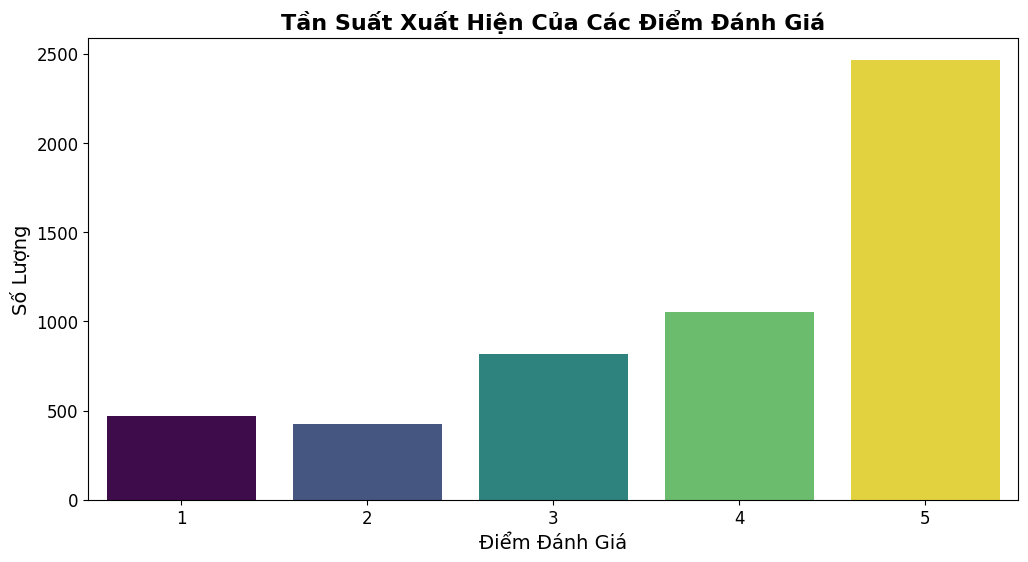

In [90]:

# Vẽ biểu đồ cột cho tần suất xuất hiện của các điểm đánh giá
plt.figure(figsize=(12, 6))
sns.countplot(data=df_data, x='Rating', order=df_data['Rating'].sort_values().unique(), palette='viridis', hue='Rating', legend=False)

# Thay đổi các yếu tố thiết kế
plt.title('Tần Suất Xuất Hiện Của Các Điểm Đánh Giá', fontsize=16, fontweight='bold')
plt.xlabel('Điểm Đánh Giá', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()

> Biểu đồ tròn biểu diễn tỷ lệ phần trăm của các điểm đánh giá

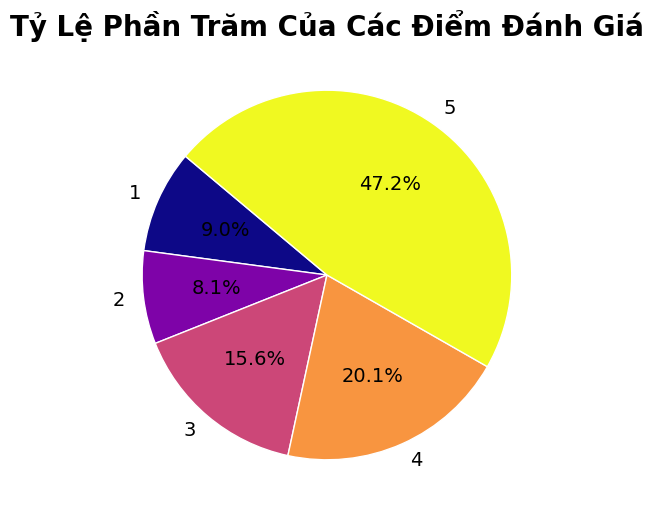

In [101]:

# Tính tỷ lệ phần trăm của mỗi điểm đánh giá
rating_counts = df_data['Rating'].value_counts(normalize=True) * 100
rating_counts = rating_counts.sort_index()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))

# Tạo biểu đồ tròn
plt.pie(
    rating_counts, 
    labels=rating_counts.index, 
    autopct='%1.1f%%',
    colors=plt.cm.plasma(np.linspace(0, 1, len(rating_counts))),  # Thay đổi màu sắc
    startangle=140,
    wedgeprops=dict(edgecolor='w'),  # Thay đổi chỉ viền trắng cho các mảnh
    textprops={'fontsize': 14}  # Tăng kích thước chữ cho nhãn
)

# Thay đổi các yếu tố thiết kế
plt.title('Tỷ Lệ Phần Trăm Của Các Điểm Đánh Giá', fontsize=20, fontweight='bold')  # Thay đổi kích thước chữ tiêu đề

# Hiển thị biểu đồ
plt.show()

> Biểu đồ biểu diễn sự phân bố của các từ phổ biến trong câu bình luận

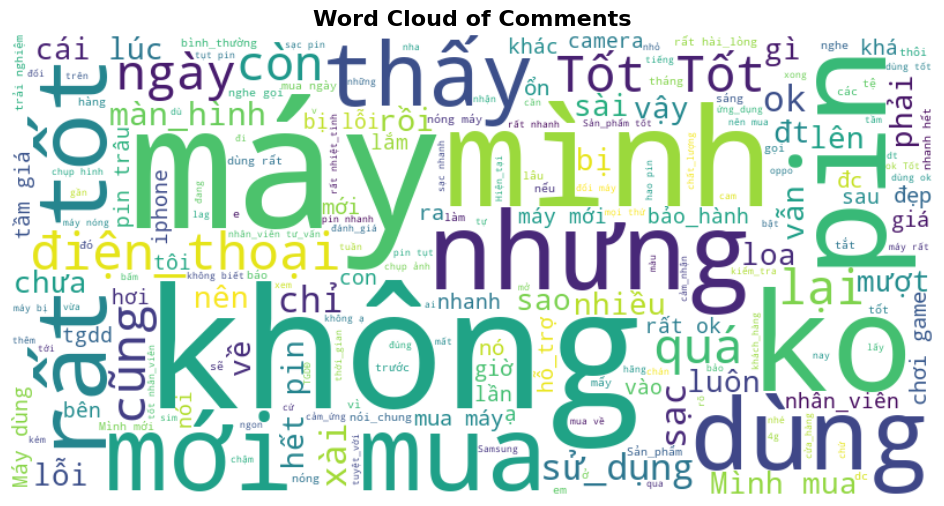

In [103]:
# Tạo chuỗi văn bản từ các bình luận
text = ' '.join(df_data['Comment'])

# Danh sách từ dừng tiếng Việt
stopwords_vietnamese = set([
    'của', 'và', 'là', 'trong', 'có', 'đã', 'để', 'theo', 'cho', 'như', 'một', 'này', 'nào',
    'nữa', 'được', 'đối', 'với', 'thì', 'cả', 'rằng', 'bởi', 'khi', 'mà', 'từ', 'hơn', 'hay', 'đến'
])

# Phân tích từ cho tiếng Việt và lọc từ dừng
def preprocess_text(text):
    # Phân tích từ
    tokenized_text = ViTokenizer.tokenize(text)
    # Chia chuỗi thành danh sách các từ
    words = tokenized_text.split()
    # Lọc từ dừng
    filtered_words = [word for word in words if word not in stopwords_vietnamese]
    return ' '.join(filtered_words)

# Xử lý văn bản
processed_text = preprocess_text(text)

# Tạo word cloud
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments', fontsize=16, fontweight='bold')
plt.show()

> Biểu đồ phân phối số lượng đánh giá theo thời gian sử dụng 

In [120]:
def classify_time_used(days):
    if days <= 14:
        return '0-14 ngày'
    elif 15 <= days <= 30:
        return '15-30 ngày'
    elif 31 <= days <= 60:
        return '30-60 ngày'
    else:
        return 'Trên 60 ngày'

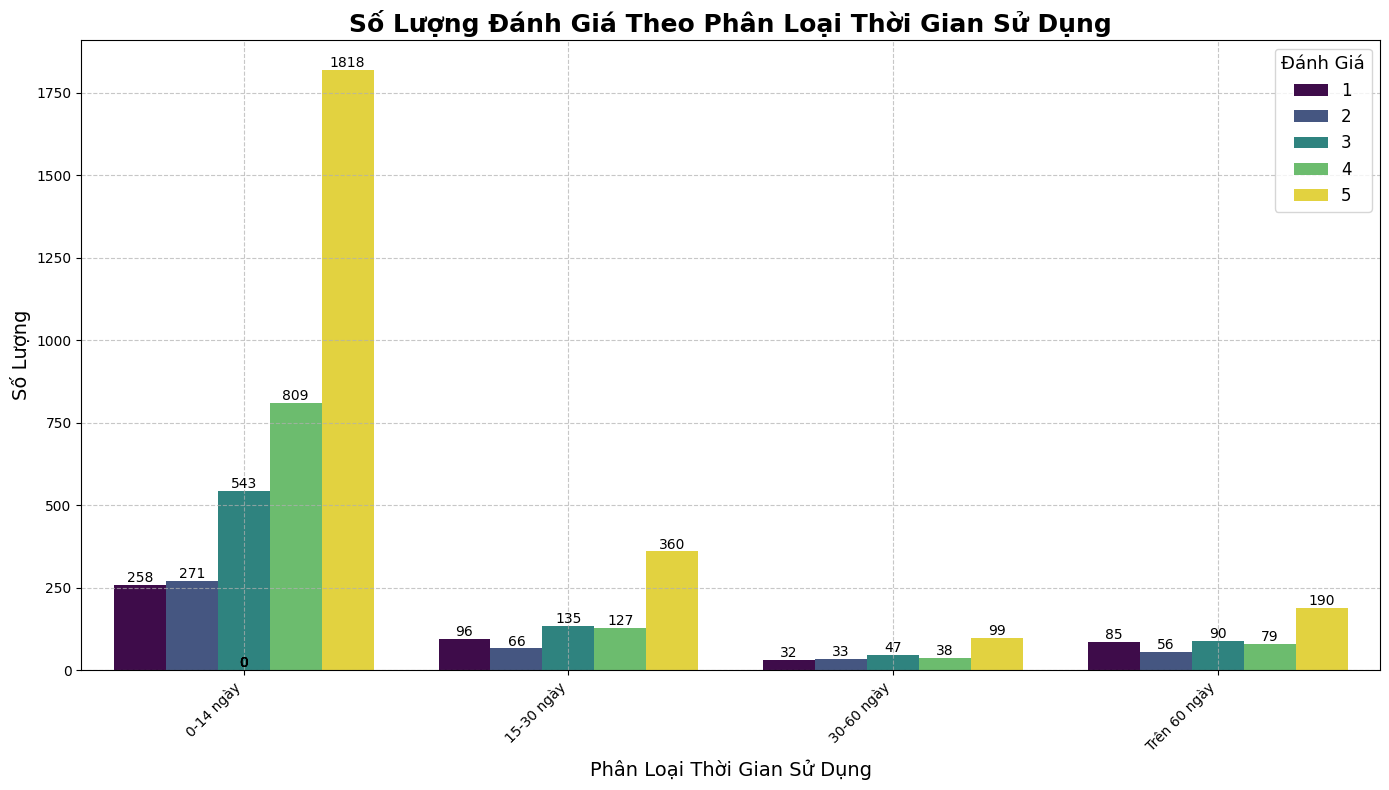

In [121]:
df_data['Time Category'] = df_data['Time Used'].apply(classify_time_used)

# Tạo bảng tóm tắt số lượng đánh giá theo phân loại thời gian
summary = df_data.groupby(['Time Category', 'Rating']).size().reset_index(name='Count')

# Đổi tên cột để dễ sử dụng
summary.columns = ['Phân Loại Thời Gian', 'Đánh Giá', 'Số Lượng']

# Vẽ biểu đồ cột nhóm
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=summary, x='Phân Loại Thời Gian', y='Số Lượng', hue='Đánh Giá', palette='viridis')

# Thêm nhãn số lượng lên đầu cột
for patch in barplot.patches:
    height = patch.get_height()
    barplot.annotate(f'{int(height)}',
                     (patch.get_x() + patch.get_width() / 2, height),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points',
                     fontsize=10,
                     color='black')

# Thay đổi các yếu tố thiết kế
plt.title('Số Lượng Đánh Giá Theo Phân Loại Thời Gian Sử Dụng ', fontsize=18, fontweight='bold')
plt.xlabel('Phân Loại Thời Gian Sử Dụng', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.legend(title='Đánh Giá', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


> Biểu đồ biểu diễn đánh giá theo thời gian sử dụng trong vòng 10 ngày

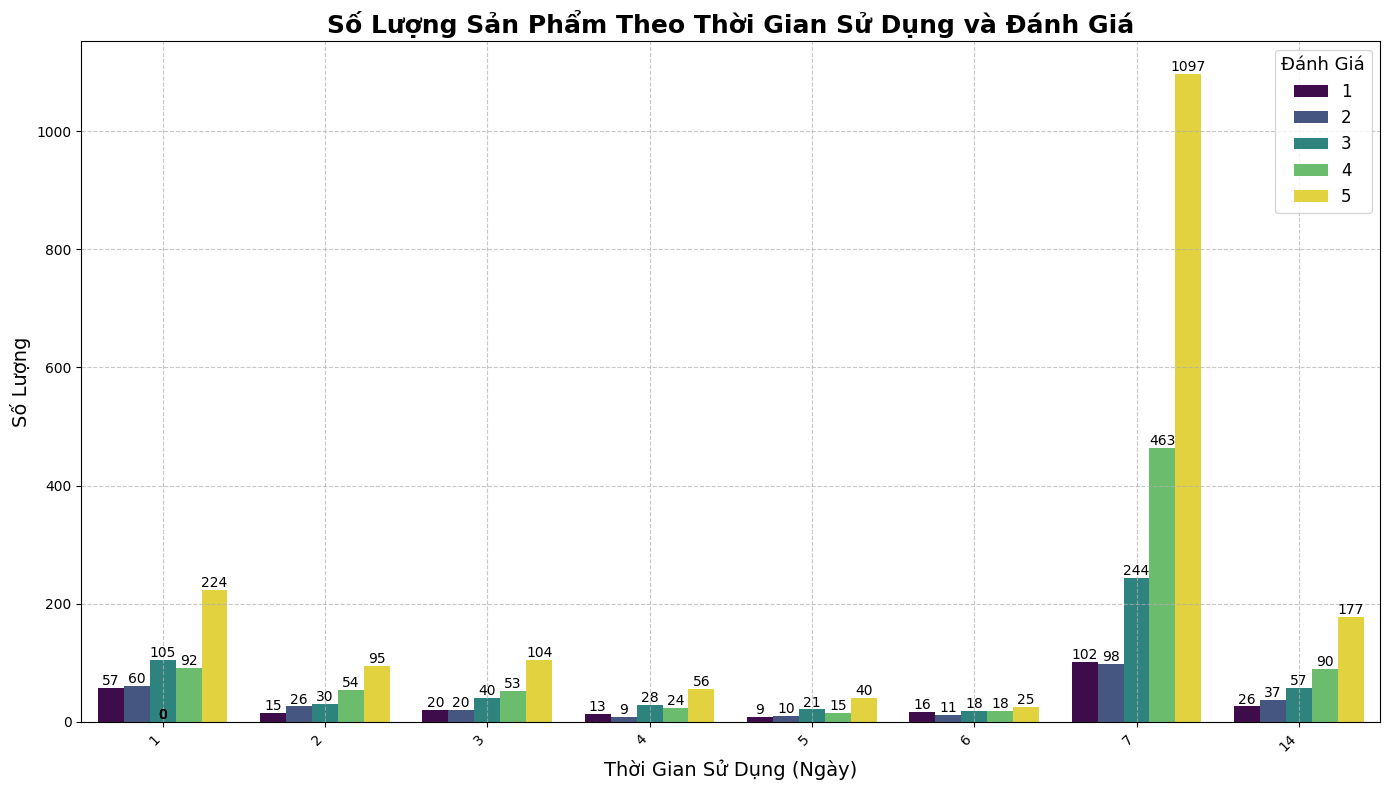

In [113]:

# Lọc dữ liệu cho thời gian sử dụng từ 1 đến 20 ngày
filtered_data = df_data[(df_data['Time Used'] >= 1) & (df_data['Time Used'] <= 20)]

# Tạo bảng tóm tắt số lượng sản phẩm theo mức đánh giá và thời gian sử dụng
summary = filtered_data.groupby(['Time Used', 'Rating']).size().reset_index(name='Count')

# Đổi tên cột để dễ sử dụng
summary.columns = ['Thời Gian Sử Dụng', 'Đánh Giá', 'Số Lượng']

# Vẽ biểu đồ cột nhóm
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=summary, x='Thời Gian Sử Dụng', y='Số Lượng', hue='Đánh Giá', palette='viridis')

# Thêm nhãn số lượng lên đầu cột
for patch in barplot.patches:
    height = patch.get_height()
    barplot.annotate(f'{int(height)}', 
                     (patch.get_x() + patch.get_width() / 2, height),
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points', 
                     fontsize=10, 
                     color='black')

# Thay đổi các yếu tố thiết kế
plt.title('Số Lượng Sản Phẩm Theo Thời Gian Sử Dụng và Đánh Giá trong vòng 10 ngày', fontsize=18, fontweight='bold')
plt.xlabel('Thời Gian Sử Dụng (Ngày)', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.legend(title='Đánh Giá', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


> Biểu đồ tròn biểu diễn tỷ lệ phần trăm số lượng đánh giá trong vòng 20 ngày

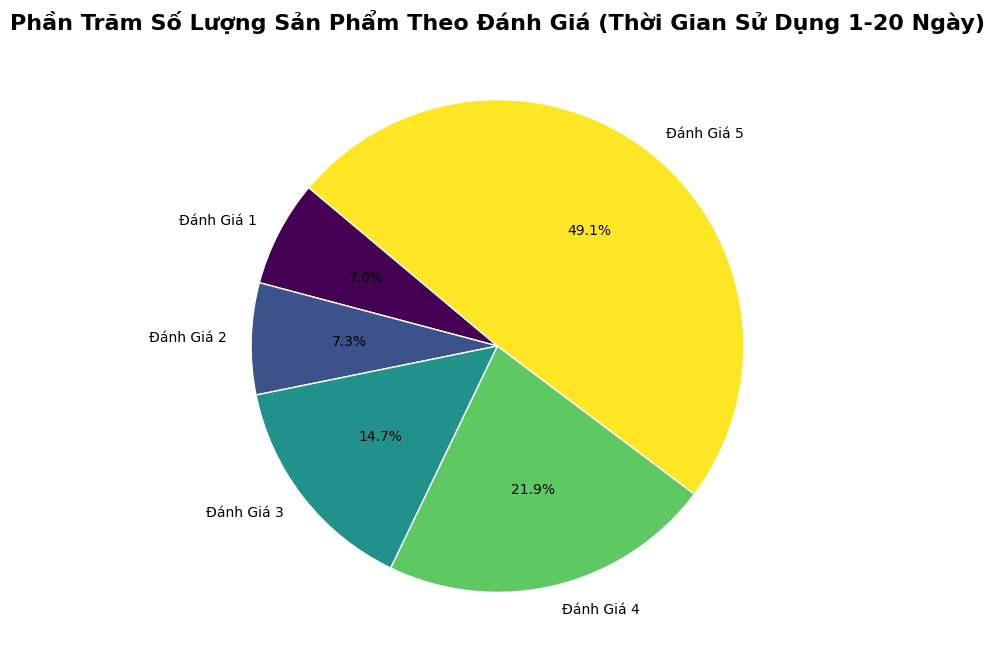

In [114]:

# Tính tổng số lượng sản phẩm
total_count = summary['Số Lượng'].sum()

# Tính tỷ lệ phần trăm cho từng mức đánh giá
percentages = summary.groupby('Đánh Giá')['Số Lượng'].sum() / total_count * 100
percentages = percentages.sort_index()

# Tạo dữ liệu cho biểu đồ tròn
labels = [f'Đánh Giá {rating}' for rating in percentages.index]
sizes = percentages.values
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))  # Chọn màu sắc khác nhau cho các phần
# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops=dict(edgecolor='w')  # Thêm viền trắng cho các mảnh
)

# Thay đổi các yếu tố thiết kế
plt.title('Phần Trăm Số Lượng Sản Phẩm Theo Đánh Giá (Thời Gian Sử Dụng 1-20 Ngày)', fontsize=16, fontweight='bold')

# Hiển thị biểu đồ
plt.show()


> Mối quan hệ giữa giá và thời gian sử dụng

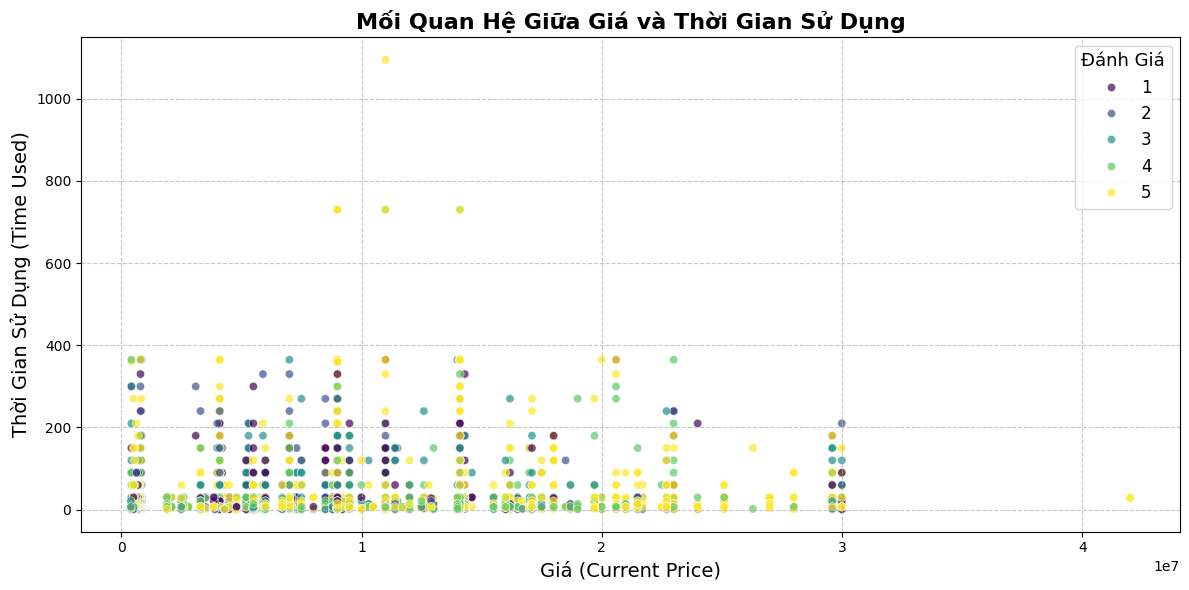

In [127]:
# Vẽ biểu đồ scatter plot giữa Giá và Thời Gian Sử Dụng
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_data, x='Current Price', y='Time Used', hue='Rating', palette='viridis', edgecolor='w', alpha=0.7)

# Thay đổi các yếu tố thiết kế
plt.title('Mối Quan Hệ Giữa Giá và Thời Gian Sử Dụng', fontsize=16, fontweight='bold')
plt.xlabel('Giá (Current Price)', fontsize=14)
plt.ylabel('Thời Gian Sử Dụng (Time Used)', fontsize=14)
plt.legend(title='Đánh Giá', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


> Ma trận tương quan giữa các biến

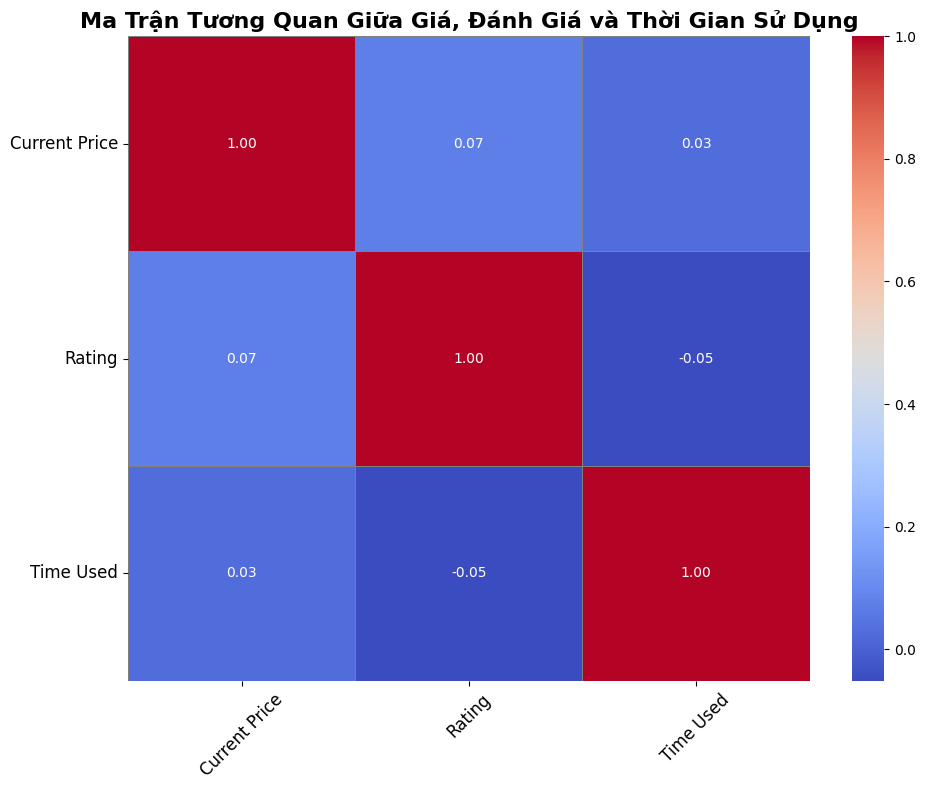

In [125]:
# Chọn các cột cần thiết
selected_columns = ['Current Price', 'Rating', 'Time Used']
df_selected = df_data[selected_columns]

# Tính toán ma trận tương quan
correlation_matrix = df_selected.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray')

# Thay đổi các yếu tố thiết kế
plt.title('Ma Trận Tương Quan Giữa Giá, Đánh Giá và Thời Gian Sử Dụng', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

In [126]:
df_data.columns

Index(['Product Name', 'Current Price', 'Reviewer', 'Rating', 'Comment',
       'Time Used', 'Time Category'],
      dtype='object')